In [22]:
#number_images = len(os.listdir(image_256))
print(os.path.exists(image_256))

True


In [2]:
import os
import cv2
import numpy as np
import glob
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import shutil
from tqdm import tqdm
import random


In [3]:
#root="E:/Urban_enhanced/" Path to root directory
print(os.path.exists(root))

True


In [13]:
#root=r"E:/PROJECT/DATAPREPARATION/DATASET/TEST/"
#root=r"E:/PROJECT/DATAPREPARATION/DATASET/TEST/"
#root="E:/Dataset/PROJECT/DATA/"

image=root+"Temporal_png/"
annotation=root+"Urban_png/"

correct_mask=root+"correct_mask/"
patch=root+"256_patches/"
image_256=root+"256_patches/image_256/"
mask_256=root+"256_patches/mask_256/"
filter_image=root+"256_patches/filter_images/"
filter_mask=root+"256_patches/filter_masks/"

augument_image=root+"256_patches/annotate_image/"
augument_mask=root+"256_patches/annotate_mask/"

data=root+"256_patches/DATA/"

images_prepped_train=root+"256_patches/DATA/images_prepped_train/"
images_prepped_test=root+"256_patches/DATA/images_prepped_test/"
annotations_prepped_train=root+"256_patches/DATA/annotations_prepped_train/"
annotations_prepped_test=root+"256_patches/DATA/annotations_prepped_test/"
validation_image=root+"256_patches/DATA/validation_image/"
validation_mask=root+"256_patches/DATA/validation_mask/"
ls=[image,annotation,correct_mask,patch,augument_image,augument_mask,image_256,mask_256,filter_image,filter_mask,data,images_prepped_train,images_prepped_test,annotations_prepped_train,annotations_prepped_test,validation_mask,validation_image]
for i in ls:
    if(not(os.path.exists(i))):
        print(i+" Directory not present")
        os.mkdir(i)
        


In [14]:
def convert_label(annotation,correct_mask):
    for path , dirs,files in os.walk(annotation):
        for i in tqdm(files):
            im=cv2.imread(annotation+i,cv2.IMREAD_UNCHANGED)
            for k in range(0,len(im)):
                 for j in range(0,len(im[k])):
                     if(im[k][j]==255):
                         im[k][j]=1
            cv2.imwrite(correct_mask+i, im)
#convert_label(annotation,correct_mask)

In [15]:
def Create_patches(image,correct_mask,image_256,mask_256):
    patch_size = 256
    c=0
    for path, subdirs, files in os.walk(image):
        #print(path)  
        dirname = path.split(os.path.sep)[-1]
        #print(dirname)
        images = os.listdir(path)  #List of all image names in this subdirectory
        #print(images)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".png"):
                #print(image_name)
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)   
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (256, 256, 3), step=256)  #Step=256 for 256 patches means no over
            
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                    
                        single_patch_img = patches_img[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #We will preprocess using one of the backbones
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
                    
                        cv2.imwrite(image_256+str(c)+".png", single_patch_img)
                        c+=1
                        #image_dataset.append(single_patch_img)
    c=0
    for path, subdirs, files in os.walk(correct_mask):
        #print(path)  
        dirname = path.split(os.path.sep)[-1]
        print(dirname)
        masks = os.listdir(path)  #List of all image names in this subdirectory
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):           
                mask = cv2.imread(path+"/"+mask_name, 0)  #Read each image as Grey (or color but remember to map each color to an integer)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
   
                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                    
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        #single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        cv2.imwrite(mask_256+str(c)+".png", single_patch_mask)
                        c+=1
#Create_patches(image,annotation,image_256,mask_256)
#Create_patches(image,correct_mask,image_256,mask_256)

In [16]:
print(filter_mask)


E:/Urban_enhanced/256_patches/filter_masks/


In [17]:


def filtr_img(image_256,mask_256,filter_image,filter_mask,num_length,limit):
    count=0
    for i in tqdm(range(0,num_length)):
        num=i
        mask=mask_256+str(num)+".png"
        image=image_256+str(num)+".png"
    

        im_mask=cv2.imread(mask,0)


        c=0
        for j in range(0,256):
            for k in range(0,256):
                if im_mask[j][k]==1:
                    c+=1
    
        res=c/(256.0*256)*100

        if res>limit:
            destination_mask=filter_mask
            shutil.copy(mask,destination_mask)
            os.rename(filter_mask+str(num)+".png",filter_mask+str(count)+".png")
            source_image=image
            destination_image=filter_image
            shutil.copy(image,destination_image)
            os.rename(filter_image+str(num)+".png",filter_image+str(count)+".png")
            count+=1

            
        
#filtr_img(image_256,mask_256,filter_image,filter_mask,2424,0.1)




In [18]:
def augument(image_256,mask_256,augument_image,augument_mask,num_length):
    def horizontal_mask_flip(mask):
        mask1 = mask.rotate(90)
        mask2 = mask.rotate(180)
        mask3 = mask.rotate(270)
        return mask1,mask2,mask3
    def horizontal_img_flip(img):
        img1 = img.rotate(90)
        img2 = img.rotate(180)
        img3 = img.rotate(270)
        return img1,img2,img3
    c=0
    for i in tqdm(range(0,num_length)):
        i=int(i)
        img = Image.open(image_256+str(i)+".png")
        mask= Image.open(mask_256+str(i)+".png")

        img1,img2,img3=horizontal_img_flip(img)
        mask1,mask2,mask3=horizontal_mask_flip(mask)
    
        img.save(augument_image+str(c)+".png","PNG")
        img1.save(augument_image+str(c+1)+".png","PNG")
        img2.save(augument_image+str(c+2)+".png","PNG")
        img3.save(augument_image+str(c+3)+".png","PNG")
        
        mask.save(augument_mask+str(c)+".png","PNG")
        mask1.save(augument_mask+str(c+1)+".png","PNG")
        mask2.save(augument_mask+str(c+2)+".png","PNG")
        mask3.save(augument_mask+str(c+3)+".png","PNG")
        c+=4

number_images = len(os.listdir(filter_image))

#augument(filter_image,filter_mask,augument_image,augument_mask,number_images)

In [19]:
#TEST
def test(image_256,mask_256):
    train_img_dir = image_256
    train_mask_dir = mask_256

    img_list = os.listdir(image_256)
    msk_list = os.listdir(mask_256)
    num_images = len(os.listdir(train_img_dir))
    while True:
        img_num = random.randint(0, num_images-1)
        if(os.path.exists(image_256+str(img_num)+".png")):
            break
    
    print(img_num)
    #Image.open('g4g.png')
    img=Image.open(image_256+str(img_num)+".png")
    msk=Image.open(mask_256+str(img_num)+".png")
    
    plt.figure(figsize=(12, 8))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Image')
    plt.subplot(122)
    plt.imshow(msk, cmap='gray')
    plt.title('Mask')
    plt.show()
#test(image_256,mask_256)

In [20]:
#Train Test Split
def test_train_split(length,ratio,ratio2,image_256,mask_256,images_prepped_train,annotations_prepped_train,images_prepped_test,annotations_prepped_test,validation_image,validation_mask,sed=0):
    random.seed(sed)
    st = list(range(0,length))
    random.shuffle(st)
    brk1=int(ratio*length)
    train=st[0:brk1]
    test_and_validate=st[brk1:length]
    random.shuffle(test_and_validate)
    length2=len(test_and_validate)
    brk2=int(ratio2*length2)
    test=test_and_validate[0:brk2]
    validate=test_and_validate[brk2:length2]
  
    for i in tqdm(train):
        src_image_tr=image_256+str(i)+".png"
        src_annote_tr=mask_256+str(i)+".png"
        dst_image_tr=images_prepped_train+str(i)+".png"
        dst_annote_tr=annotations_prepped_train+str(i)+".png"
        shutil.copyfile(src_image_tr,dst_image_tr)
        shutil.copyfile(src_annote_tr,dst_annote_tr)
    for i in tqdm(test):
        src_image=image_256+str(i)+".png"
        src_annote=mask_256+str(i)+".png"
        dst_image=images_prepped_test+str(i)+".png"
        dst_annote=annotations_prepped_test+str(i)+".png"
        shutil.copyfile(src_image,dst_image)
        shutil.copyfile(src_annote,dst_annote)
    for i in tqdm(validate):
        src_image=image_256+str(i)+".png"
        src_annote=mask_256+str(i)+".png"
        dst_image=validation_image+str(i)+".png"
        dst_annote=validation_mask+str(i)+".png"
        shutil.copyfile(src_image,dst_image)
        shutil.copyfile(src_annote,dst_annote)

    return test,train,validate
num_images = len(os.listdir(augument_image))
#test,train,validate=test_train_split(100,0.75,0.5,augument_image,augument_mask,images_prepped_train,annotations_prepped_train,images_prepped_test,annotations_prepped_test,validation_image,validation_mask)

Converting Labels


100%|██████████| 7365/7365 [4:27:13<00:00,  2.18s/it]  


Label Conversion Done!!
Patching Images
Now patchifying image: E:/Urban_enhanced/Temporal_png//0.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//10.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//100.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1000.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1001.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1002.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1003.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1004.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1005.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1006.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1007.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1008.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//1009.png
Now patchifying image: E:/Urban_enhanced/Temporal_png//101.png
Now patchi

100%|██████████| 176760/176760 [4:02:15<00:00, 12.16it/s]  


Filteration Done
Augumenting Images


100%|██████████| 87063/87063 [2:39:02<00:00,  9.12it/s]  


Augumentation Done
135871


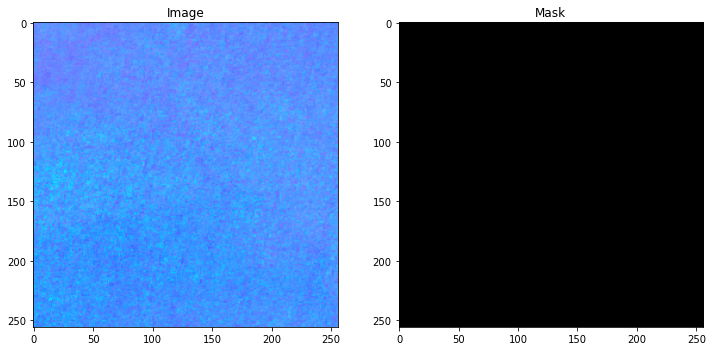

train-test split


100%|██████████| 43532/43532 [01:55<00:00, 377.13it/s]

split done


In [21]:
print("Converting Labels")
convert_label(annotation,correct_mask)
print("Label Conversion Done!!")
print("Patching Images")
Create_patches(image,correct_mask,image_256,mask_256)
print("Patchification Done!!")
number_images = len(os.listdir(image_256))
print("Filtering Images")
filtr_img(image_256,mask_256,filter_image,filter_mask,number_images,0.30)
print("Filteration Done")
number_images = len(os.listdir(filter_image))
print("Augumenting Images")
augument(filter_image,filter_mask,augument_image,augument_mask,number_images)
print("Augumentation Done")
test(image_256,mask_256)
number_images = len(os.listdir(augument_image))
print("train-test split")
test,train,validate=test_train_split(number_images,0.75,0.5,augument_image,augument_mask,images_prepped_train,annotations_prepped_train,images_prepped_test,annotations_prepped_test,validation_image,validation_mask)
print("split done")

268


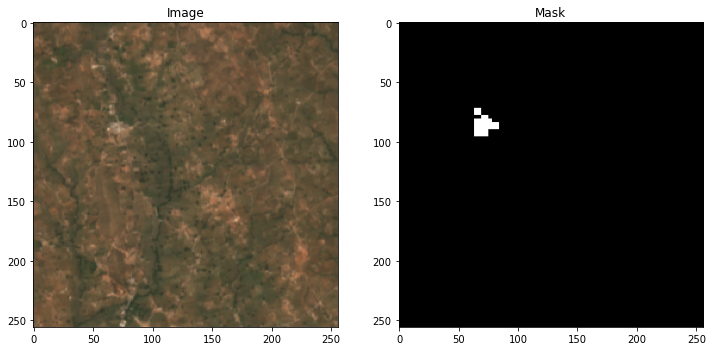

In [35]:
test(images_prepped_test,annotations_prepped_test)

1428


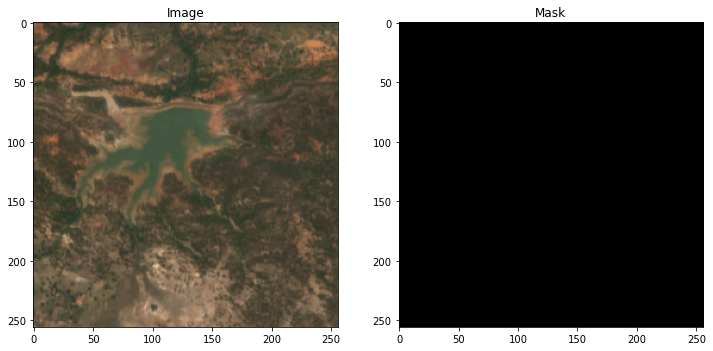

In [36]:
test(image_256,mask_256)